In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data [:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))


Class labels: [0 1 2]


In [2]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('Lables count in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Lables count in y_test:',np.bincount(y_test))

Lables count in y: [50 50 50]
Labels counts in y_train: [34 32 39]
Lables count in y_test: [16 18 11]


In [3]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:

from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples : %d' % (y_test !=y_pred).sum())

In [ ]:
from sklearn.metrics import accuracy_score 
print('Accuracy : %.2f' % ppn.score(X_test_std,y_test))

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

# Training Logistic Regression model with scikit learn

In [5]:
from sklearn.linear_model import LogisticRegression 
%matplotlib notebook
import matplotlib.pyplot as plt 

In [6]:
lr = LogisticRegression(C=100.0,random_state=1)
lr.fit(X_train_std,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


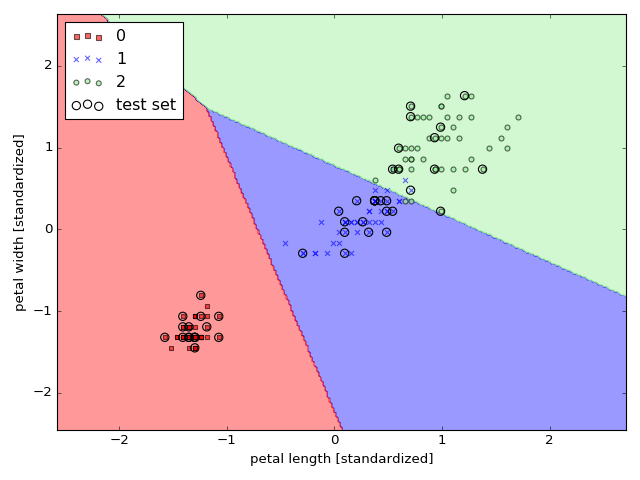

In [8]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

### Prediction

In [ ]:
#Probability for every class
lr.predict_proba(X_test_std[:3,:])  

In [ ]:
# Proof total probability = 1
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

In [ ]:
# Final Classes 
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

In [ ]:
lr.predict(X_test_std[:3 , :])

In [ ]:
# Predict single class 
X_test_std[0,:] 

In [ ]:
X_test_std[0,:].reshape(1,-1)

In [ ]:
lr.predict(X_test_std[0,:].reshape(1,-1))

### L2 Regularization

<IPython.core.display.Javascript object>


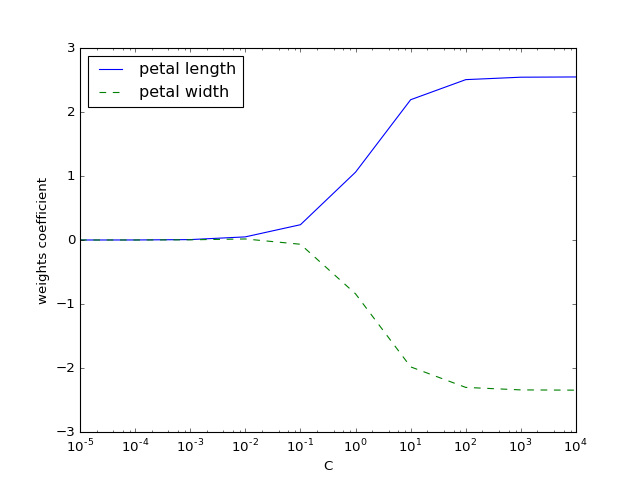

In [18]:
weights, params = [],[] 
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,random_state=1) 
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1]) 
    params.append(10.**c) 
    
weights = np.array(weights)
plt.plot(params,weights[:,0],label ='petal length') 
plt.plot(params,weights[:,1],linestyle = '--',label = 'petal width') 
plt.ylabel('weights coefficient') 
plt.xlabel('C') 
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## SKLEARN SUPPORT VECTOR MACHINE

<IPython.core.display.Javascript object>


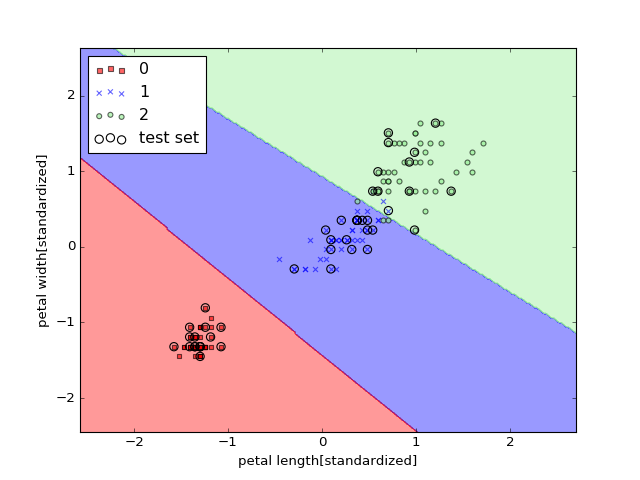

In [19]:
from sklearn.svm import SVC 
svm = SVC(kernel ='linear' , C= 1.0 , random_state =1) 
svm.fit(X_train_std,y_train) 
plot_decision_regions(X_combined_std,y_combined,classifier =svm , test_idx = range(105,150)) 
plt.xlabel('petal length[standardized]') 
plt.ylabel('petal width[standardized]') 
plt.legend(loc='upper left') 
plt.show()

# Solving non-linear problems using a kernel SVM


<IPython.core.display.Javascript object>


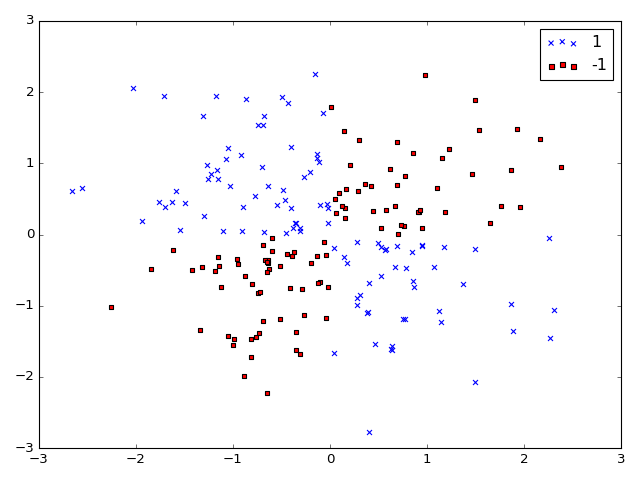

In [27]:
np.random.seed(0) 
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1] > 0)  
y_xor = np.where(y_xor,1,-1)  

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


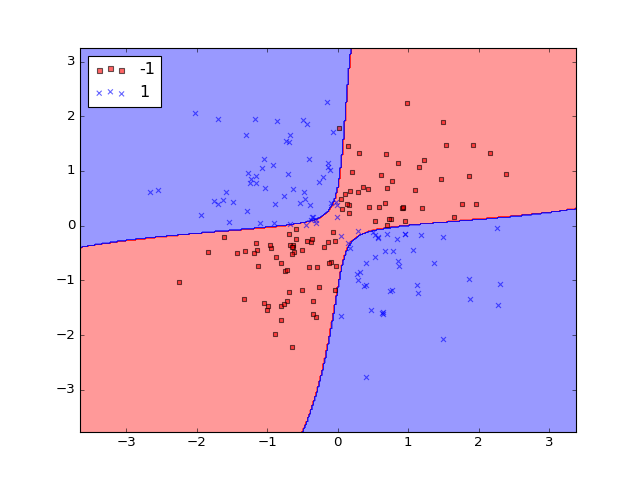

In [28]:
svm = SVC(kernel ='rbf',random_state=1,gamma = 0.10,C=10.0) 
svm.fit(X_xor,y_xor) 
plot_decision_regions(X_xor,y_xor,classifier = svm) 
plt.legend(loc='upper left') 
plt.show()

### Influence of gammar parameter in SVM 

<IPython.core.display.Javascript object>


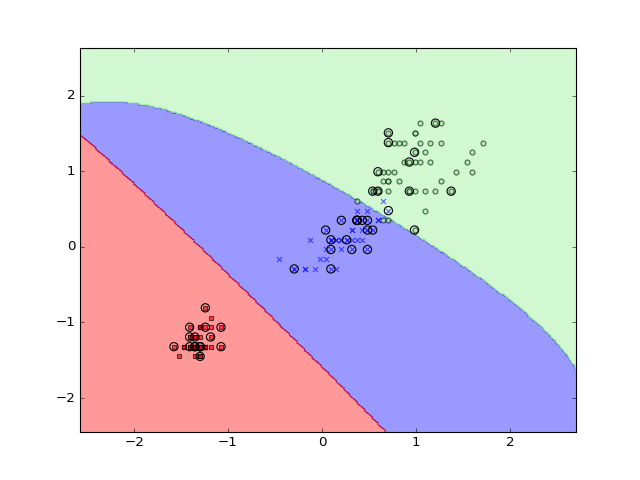

In [30]:
#gamma = 0.2 

svm = SVC(kernel ='rbf' , random_state =1,gamma =0.2 ,C =1.0)
svm.fit(X_train_std , y_train) 
plot_decision_regions(X_combined_std,y_combined,classifier = svm , test_idx =range(105,150))

<IPython.core.display.Javascript object>


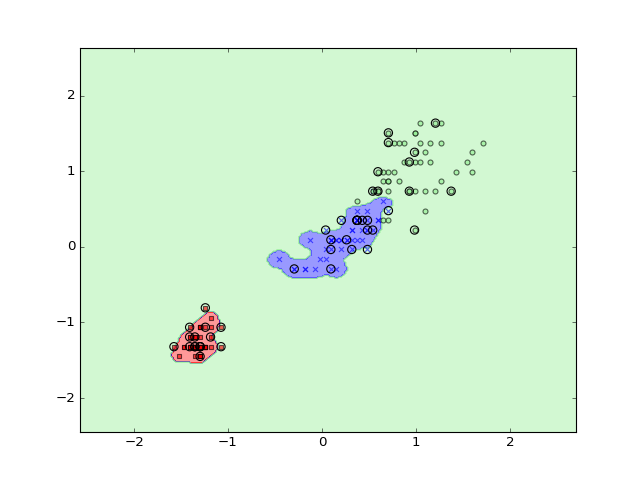

In [31]:
#gamma = 100

svm = SVC(kernel ='rbf' , random_state =1,gamma = 100 ,C =1.0)
svm.fit(X_train_std , y_train) 
plot_decision_regions(X_combined_std,y_combined,classifier = svm , test_idx =range(105,150))

# Building a decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion ='gini', max_depth =3,random_state=1) 
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

<IPython.core.display.Javascript object>


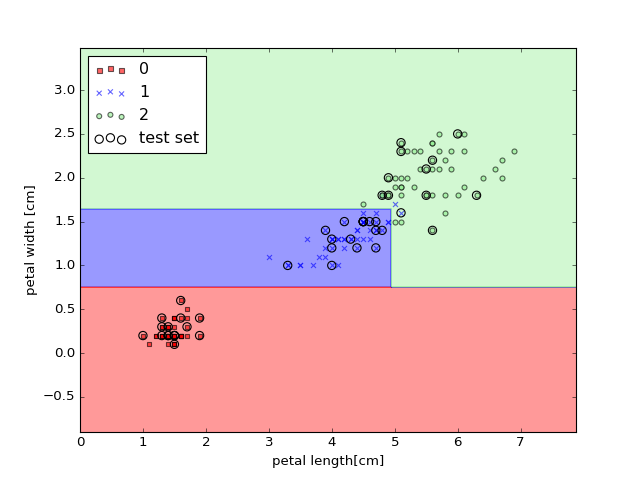

In [40]:
X_combined =np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier =tree,test_idx =range(105,150)) 
plt.xlabel('petal length[cm]')
plt.ylabel('petal width [cm]') 
plt.legend(loc='upper left') 
plt.show()

## Combining multiple decision trees via random forests

In [49]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(criterion='gini',n_estimators =15,random_state =1 , n_jobs =2 )

In [51]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


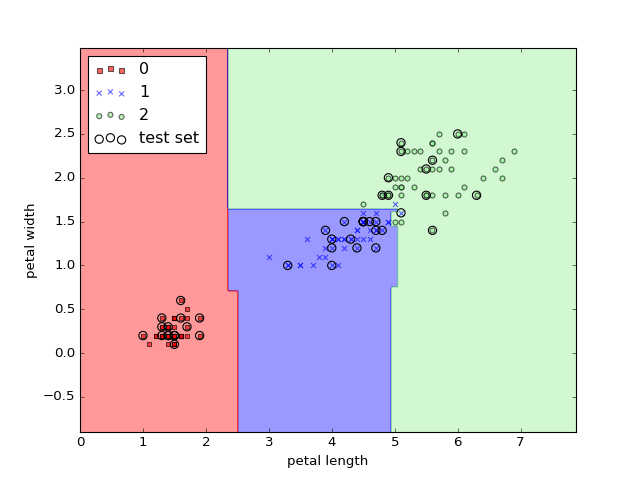

In [52]:
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150)) 
plt.xlabel('petal length')
plt.ylabel('petal width') 
plt.legend(loc ='upper left')
plt.show()

# Building K nearest Neighbour

<IPython.core.display.Javascript object>


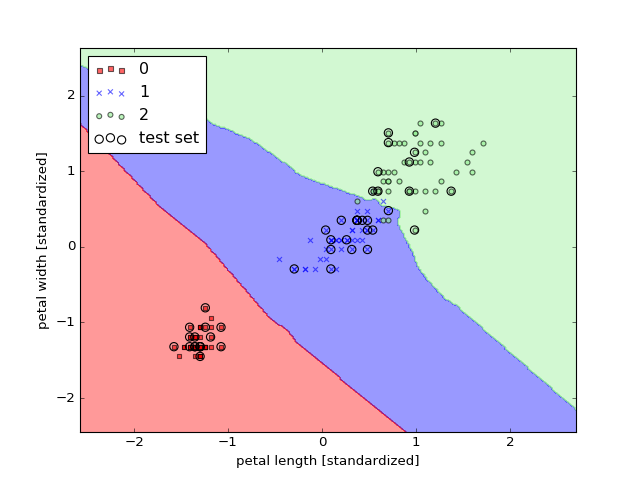

In [55]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors =5 ,p=2 , metric ='minkowski') 
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]') 
plt.legend(loc ='upper left') 
plt.show()